#**Predicting Happiness**

In this problem set you will work with a data set from the [World Happiness Website](https://worldhappiness.report/ed/2018/).

You will use the data in the file,  WHR2018Chapter2OnlineData.xls.

Our goal will be to develop a model for happiness.


#[DSLC Stage 1]: Domain Problem and Data Collection

Read the description of the data at the World Happiness Website.

1. From your new domain knowledge, what variable will you use as a response or dependent variable for your model of happiness? <br>
<b>From my new domain knowledge, I will use the "Life Ladder" variable as my dependent variable for my model of happiness."GINI index (World Bank Estimate)," and "Confidence in national government."</b>
2. From your new domain knowledge, what variables will you consider as potential predictor (or independent) variables? <br>
<b>From my new domain knowledge, I will consider the following variables as potential predictors: "Social support," "Healthy life expectancy at birth", "GINI index (World Bank Estimate)," and "Confidence in national government."</b>
3. From your new domain knowledge, can you identify any variables that are cofounders? <br>
<b>Yes, many variables are cofounders. For example, I would expect "Log GDP per capita" to positively correlate with "GINI index (World Bank Estimate)," and for "Perceptions of corruption" to negatively correlate with "Confidence in national government."</b>
4. Please share one question that you still have about the data collection process. <br>
<b>I am curious as to whether the data collection process has properly accounted for areas without sufficient access to communications. For example, since it seems like the survey requires access to either the internet or a phone, are people without either of these sufficiently represented in the survey?</b>

# [DSLC stage 2]: Data cleaning, pre-processing, and exploratory data analysis


In this section you will load and clean the data. Please run the code provide and complete modifications as specified.


In [37]:
# Installing scikit-lego package
%pip install scikit-lego

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [38]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LADRegression



pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

In [39]:
# load the happiness data in file WHR2018Chapter2OnlineData.xls
# Upload this file using the folder to left
happiness_orig = pd.read_excel("WHR2018Chapter2OnlineData.xls", sheet_name=0)
happiness_orig

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,Zimbabwe,2013,4.690188,7.565154,0.799274,48.949745,0.575884,-0.076716,0.830937,0.711885,0.182288,0.527755,-1.026085,-1.526321,1.964805,0.418918,NaN,0.432,0.555439
1558,Zimbabwe,2014,4.184451,7.562753,0.765839,50.051235,0.642034,-0.045885,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,NaN,0.432,0.601080
1559,Zimbabwe,2015,3.703191,7.556052,0.735800,50.925652,0.667193,-0.094585,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,NaN,0.432,0.655137
1560,Zimbabwe,2016,3.735400,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,0.208555,0.699344,-0.863044,-1.371214,2.776363,0.743257,NaN,0.432,0.596690


In [40]:
# Examine the first 10 rows
happiness_orig.head(10)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


In [41]:
happiness_orig.sample(n=10)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
509,Ghana,2017,5.481311,8.326971,0.669111,54.865891,0.783046,0.084990,0.838610,0.702512,0.247519,0.670289,NaN,NaN,2.551120,0.465421,NaN,0.425000,0.501202
903,Mexico,2012,7.320185,9.700418,0.767279,67.311714,0.787768,-0.099098,0.633281,0.784479,0.278111,0.361409,-0.274854,-0.031543,2.074157,0.283348,0.481,0.484750,0.426430
764,Laos,2012,4.876085,8.417758,0.692628,56.269176,NaN,0.238068,NaN,0.916801,0.386679,NaN,-0.804916,-0.882167,1.696086,0.347838,0.364,0.348000,0.611756
218,Cambodia,2011,4.161225,7.885596,0.715519,56.676956,0.927462,0.419221,0.775356,0.799231,0.307869,0.901220,-0.609274,-0.932540,1.331610,0.320004,NaN,NaN,0.526038
580,Hungary,2015,5.344383,10.128008,0.858734,66.845657,0.557721,-0.209219,0.907530,0.706815,0.244536,0.279212,0.653114,0.453057,1.878782,0.351543,NaN,0.296818,0.293777
577,Hungary,2012,4.683358,10.024912,0.906114,66.055801,0.569232,-0.147044,0.930297,0.651908,0.315398,0.209778,0.712581,0.647108,2.094284,0.447176,0.305,0.296818,0.310641
73,Austria,2016,7.048072,10.700048,0.926319,72.049713,0.888514,0.071685,0.523641,0.755903,0.197424,0.432638,1.053763,1.568970,1.704400,0.241825,NaN,0.303818,0.292294
1114,Philippines,2017,5.594270,8.938968,0.851029,60.251492,0.925703,-0.147852,0.711166,0.768981,0.340622,0.837730,NaN,NaN,2.597185,0.464258,NaN,0.418833,0.503399
1035,North Cyprus,2016,5.827128,NaN,0.807690,NaN,0.796234,NaN,0.670191,0.643664,0.346465,0.440595,NaN,NaN,1.857638,0.318791,NaN,NaN,0.293436
254,Chad,2007,4.141327,7.462495,0.478951,42.016632,0.294612,-0.020856,0.873610,0.613522,0.245208,0.228145,-1.658627,-1.420364,1.566389,0.378234,NaN,0.415500,NaN


5. Please share one question that you still have about the data itself. <br>
<b>One question I still have about the data is where the null values are from, assuming that the surveys were always standardized. Why do some rows have multiple missing values if all countries were given the same questions?</b>
6. What is the observational unit in the data?<br>
<b>The observational unit in the data is the country.</b>

In [42]:
# 1. Calculate the percent of missingness of each variable in the data
missingness = (happiness_orig.isnull().sum() * 100.0 / len(happiness_orig)).sort_values(ascending=False)
print(missingness)
# 2. Visualize the percent of missingness of each variable in a heatmap
px.imshow(happiness_orig.isna().astype(int),
          color_continuous_scale='Greys')

GINI index (World Bank estimate)                            62.676056
gini of household income reported in Gallup, by wp5-year    22.855314
GINI index (World Bank estimate), average 2000-15           11.267606
Delivery Quality                                            10.947503
Democratic Quality                                          10.947503
Confidence in national government                           10.307298
Perceptions of corruption                                    5.761844
Generosity                                                   5.121639
Freedom to make life choices                                 1.856594
Log GDP per capita                                           1.728553
Positive affect                                              1.152369
Social support                                               0.832266
Negative affect                                              0.768246
Healthy life expectancy at birth                             0.576184
year                

In [43]:
# This is a data cleaning function that is provided for you.
# Please feel free to modify this based on decisions you make
# during the pre-processing step. Document any changes you make and why.
def clean_happiness(happiness_orig, predictor_variable = None):
  # rename column names
  happiness_clean = happiness_orig.rename(columns={
    "Life Ladder": "happiness",
    "Log GDP per capita": "log_gdp_per_capita",
    "Social support": "social_support",
    "Healthy life expectancy at birth": "life_expectancy",
    "Freedom to make life choices": "freedom_choices",
    "Generosity": "generosity",
    "Perceptions of corruption": "corruption",
    "Positive affect": "positive_affect",
    "Negative affect": "negative_affect",
    "Confidence in national government": "government_confidence",
    "gini of household income reported in Gallup, by wp5-year": "gini_index"})
  # filter to relevant columns
  happiness_clean = happiness_clean[["country", "year", "happiness", "log_gdp_per_capita",
                                     "social_support", "life_expectancy",
                                     "freedom_choices", "generosity",
                                     "corruption", "positive_affect",
                                     "negative_affect", "government_confidence",
                                     "gini_index"]]

  if (predictor_variable is not None):
    happiness_clean = happiness_clean[["country", "year", "happiness", predictor_variable]]

  return(happiness_clean)

In [44]:
# Cleaning the data
happiness_clean = clean_happiness(happiness_orig)
happiness_clean

,country,year,happiness,log_gdp_per_capita,social_support,life_expectancy,freedom_choices,generosity,corruption,positive_affect,negative_affect,government_confidence,gini_index
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,0.344540
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,Zimbabwe,2013,4.690188,7.565154,0.799274,48.949745,0.575884,-0.076716,0.830937,0.711885,0.182288,0.527755,0.555439
1558,Zimbabwe,2014,4.184451,7.562753,0.765839,50.051235,0.642034,-0.045885,0.820217,0.725214,0.239111,0.566209,0.601080
1559,Zimbabwe,2015,3.703191,7.556052,0.735800,50.925652,0.667193,-0.094585,0.810457,0.715079,0.178861,0.590012,0.655137
1560,Zimbabwe,2016,3.735400,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,0.208555,0.699344,0.596690


Edit this cell to answer the following question:
7. What variables were dropped from the original data set?  Would you drop any additional variables from this data set and why? <br>
<b>The following variables were dropped: "GINI index (World Bank estimate)," "GINI index (World Bank estimate), average 2000-15," "Delivery Quality," "Democratic Quality," "Standard deviation of ladder by country-year," and "Standard deviation/Mean of ladder by country-year." </b> <br>
<b>I would also drop "Positive affect" and "Negative affect" because they appear to be cofounders with "happiness." </b>
8. How would you impute the gini_index variable? Explain why. (You do not have to write code to do this unless you need to do so for your model. In this case, include an imputation function and call it from the data cleaning function) <br>
<b>To impute the "gini_index" variable, I would fill in missing values with the average of that country's "gini_index." If the country was missing this variable in all its entries, I would fill it in with the mean of "gini_index" calculated using the entire table. I am choosing to do it this way so that the filled-in data is reasonably accurate and can still be used to build the model.</b>

Now we will visualize the relationships between variables.

# Plot Guidelines
For all plots and visualizations for this assignment please include


*   Captions: Descriptive captions summarizing the plot's insights.
*   Legends: Clear legends identifying each element in the plot.
*   Axis Labels: Informative labels for both the x and y axes, including units if applicable.
* Style: appropriate colors, font sizes, and plot layouts for better readability and presentation.

*It is important that your visualizations are easy-to-understand plots.*

In [45]:
# Since we are predicting happiness, we need to figure out what variable to use
# as a predictor.
# TODO: Find and justify choice of predictor variable
# 1. Calculate the correlation between the happiness variable
#   and your set of remaining potential predictor variables
corr_matrix = happiness_clean.corr(numeric_only=True)['happiness'].drop('happiness').sort_values(ascending=False)
# 2. Visualize the correlations between the dependent variable
px.bar(corr_matrix, title = 'Correlation with Happiness', labels = {'index': 'Variable', 'value': 'Correlation'}).update_layout(showlegend=False)


Edit this cell to answer the following question:
9. From this investigation, what variable do you choose as your predictor and why? <br>
<b>I chose to use life_expectancy as my predictor variable. This is because it has one of the highest correlations out of all the variables present, and has the least missingness out of all the other options.</b>

**Separate data into training and validation sets**

During this stage it is important that we choose data sets for training predictive models and validating predictive models.

In [46]:
# TODO: Write code here to separate your data into a training and validation set
# (You do not need to worry about a test set right now)
happiness_clean = happiness_clean.dropna() # drop rows with empty columns before proceeding

training = happiness_clean.query('year <= 2014')
validation = happiness_clean.query('year > 2014')
# Explain your decision to separate the data this way.
# I chose to separate the data in this way because we were taught in class to have a 60-20-20 split for training-testing-validation.
# So, I chose to assign approximately 80% of the data to training and the rest to validation.
# I chose to use stratified groupings by time because each individual year has at most one of each country,
# which means that each year should be fairly similar to each other. This in turn means the sets are likely to be similar in composition.
# With any other sort of partition, the training set and validation set are less likely to be similar in composition.

# You will reuse these data subsets in the following DSLC stage.

# [DSLC stage 4]: Predictive analysis

In this section we will examine the relationship between happiness as the response variable and your predictor variable. First we will visualize the relationship between happiness and the predictor variable.

In [47]:
#TODO: For your training and validation data sets
# 1. Create data frames that only contain columns for
# country, year, happiness, and your predictor variable
# I additionally dropped any rows with empty values in order to make regression easier later on.
training_clean = training[['country', 'year', 'happiness', 'life_expectancy']]
validation_clean = validation[['country', 'year', 'happiness', 'life_expectancy']]
# 2. Create a scatterplot of happiness vs your predictor variable
px.scatter(happiness_clean, x = 'life_expectancy', y = 'happiness', labels = {'happiness': 'Happiness', 'life_expectancy': 'Life Expectancy'}, title = 'Happiness vs Life Expectancy')

# Modeling the relationship
**Using your training data set**

Train the LAD (L1 loss) and LS (L2 loss) linear fits for predicting happiness  based on your chosen predictor variable of your choosing.

*Once you have completed this, edit this cell here to report the formulas for your fitted models.*

<b>
LAD: y = 0.095x - 0.478 <br>
LS: y = 0.097x - 0.512 <br>
where y = happiness and x = life_expectancy
</b>

For the LAD model you will use  LADRegression from sklego.linear_model. Examples are available in the L04 notebook and [API documentation](https://koaning.github.io/scikit-lego/user-guide/linear-models/#least-absolute-deviation-regression)

In [48]:
# TODO: Add code here to
# 1. Train LAD model on your training Set
LAD_fit = LADRegression()
LAD_fit.fit(X=np.array(training_clean['life_expectancy']).reshape(-1, 1),
            y=training_clean['happiness'])
# 2. Get the parameters of your model to write formula
print(LAD_fit.coef_[0], LAD_fit.intercept_)

0.11190165219210314 -1.533117996609871


For the LS model you will use  LinearRegression from sklearn.linear_model. Examples are available in the L04 notebook and [API documentation](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LinearRegression.html)

In [49]:
# TODO: Add code here to
# 3. Train LS model on your training Set
LS_fit = LinearRegression()
LS_fit.fit(X=np.array(training_clean['life_expectancy']).reshape(-1, 1),
            y=training_clean['happiness'])
# 4. Get the parameters of your model to write formula
print(LS_fit.coef_[0], LS_fit.intercept_)

0.11036411541864946 -1.4250332596486626


In [50]:
# TODO: Add code here to
# 5. Create a scatterplot of happiness vs your predictor variable
#    with a line for each model
fig = px.scatter(happiness_clean, x = 'life_expectancy', y = 'happiness', labels = {'happiness': 'Happiness', 'life_expectancy': 'Life Expectancy'}, title = 'Happiness vs Life Expectancy')
fig.add_trace(
    go.Scatter(x=happiness_clean['life_expectancy'],
               y=LAD_fit.intercept_ + happiness_clean['life_expectancy'] * LAD_fit.coef_[0],
               mode='lines',
               name='LAD',
               line={'color': 'red'})
)
fig.add_trace(
    go.Scatter(x=happiness_clean['life_expectancy'],
               y=LS_fit.intercept_ + happiness_clean['life_expectancy'] * LS_fit.coef_[0],
               mode='lines',
               name='LS',
               line={'color': 'green'})
)

Now we'd like to evaluate how each model has done.

**Using your validation data set**

Compute the rMSE, MAE, MAD, correlation and  $R^2$  evaluations for each algorithm.

In [51]:
#TODO: Write code here to
# Create a  3 column dataframe that for each point in your validation set
# contains the actual observed happiness score, the happiness score predicted
# from LAD, and the happiness score predicted from LS
scores_comparison = pd.DataFrame(data = {'actual': validation_clean['happiness'],
                          'LAD': LAD_fit.predict(validation_clean['life_expectancy'].to_numpy().reshape(-1, 1)),
                          'LS': LS_fit.predict(validation_clean['life_expectancy'].to_numpy().reshape(-1, 1))})

In [52]:
# TODO: Write code here to
# Create a scatterplot of the observed happiness score vs
# the happiness score predicted from LAD
# What would a perfect prediction look like?
px.scatter(scores_comparison, x = 'actual', y = 'LAD', labels = {'actual': 'Actual Happiness Score', 'LAD': 'LAD Predicted Happiness Score'}, title = 'Actual vs LAD Predicted Happiness Scores')
# With a perfect prediction, the LAD predicted score is equal to the actual score. In this case, the scatterpot would only contain points on the line x = y.

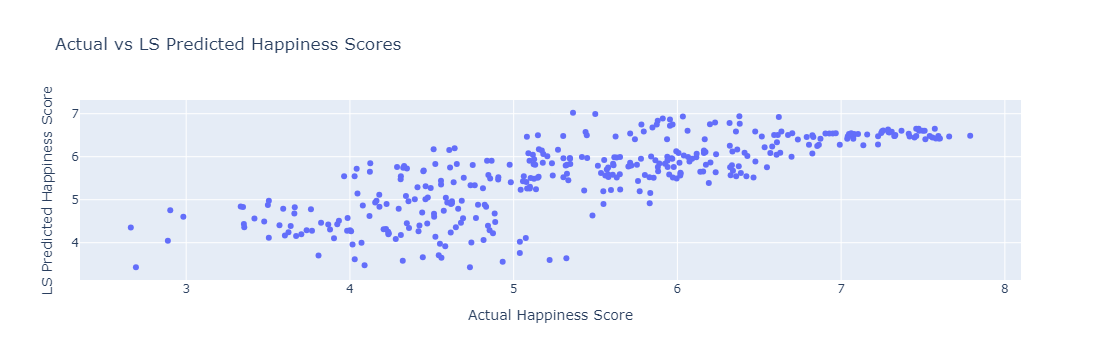

In [53]:
# TODO: Write code here to
# Create a scatterplot of the observed happiness score vs
# the happiness score predicted from LS
# What would a perfect prediction look like?
px.scatter(scores_comparison, x = 'actual', y = 'LS', labels = {'actual': 'Actual Happiness Score', 'LS': 'LS Predicted Happiness Score'}, title = 'Actual vs LS Predicted Happiness Scores')
# With a perfect prediction, the LS predicted score is equal to the actual score. In this case, the scatterpot would only contain points on the line x = y.

In [54]:
#TODO: Using the dataframe that you created
# Write code in this cell to calculate and print
# the rMSE, MAE, MAD, correlation, and R2 of
# the true price with the LS and LAD predictions

# For LAD
print('LAD rMSE:', np.sqrt(mean_squared_error(scores_comparison['actual'], scores_comparison['LAD'])))
print('LAD MAE:', mean_absolute_error(scores_comparison['actual'], scores_comparison['LAD']))
print('LAD MAD:', np.median(np.abs(scores_comparison['actual'] - scores_comparison['LAD'])))
print('LAD correlation:', scores_comparison['actual'].corr(scores_comparison['LAD']))
print('LAD R2:', r2_score(scores_comparison['actual'], scores_comparison['LAD']))

# For LSE
print('LS rMSE:', np.sqrt(mean_squared_error(scores_comparison['actual'], scores_comparison['LS'])))
print('LS MAE:', mean_absolute_error(scores_comparison['actual'], scores_comparison['LS']))
print('LS MAD:', np.median(np.abs(scores_comparison['actual'] - scores_comparison['LS'])))
print('LS correlation:', scores_comparison['actual'].corr(scores_comparison['LS']))
print('LS R2:', r2_score(scores_comparison['actual'], scores_comparison['LS']))

LAD rMSE: 0.7331838443838954
LAD MAE: 0.6036586752473376
LAD MAD: 0.5638179946320232
LAD correlation: 0.7703891050105385
LAD R2: 0.584837274244389
LS rMSE: 0.734973485690572
LS MAE: 0.6050348561915029
LS MAD: 0.566723197416211
LS correlation: 0.7703891050105383
LS R2: 0.582808044712809


**Evaluating the models**

Based on the scatterplots and evaluation metrics that you have calculated, what model is better for the relationship between happiness and your predictor variable? Please explain why with supporting evidence from your plots and calculations.

<b>The LAD model is better for the relationship between happiness and life_expectancy. Both plots look incredibly similar, so I will rely on the calculated metrics to determine which is better. LAD beats LS in every single metric except for R2 where both are fairly similar, so I believe that the LAD model is the better one.</b>

**Citation:**

This problem set is adapted from Ch. 9 exercise 22 from the following upcoming book:

Yu, B., & Barter, R. L. (2024). Veridical data science: The practice of responsible data analysis and decision making. The MIT Press.